# Lecture 13 - Bottleneck and Wasserstein Distances 

In this notebook, we're going to go through the basics of computing the Bottleneck and Wasserstein distances for persistence diagrams. 

In [1]:
import ripser 
from persim import plot_diagrams, bottleneck, wasserstein


import teaspoon.MakeData.PointCloud as gPC
import teaspoon.TDA.Draw as Draw

# Standard imports 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial import distance_matrix
import plotly.express as px
import plotly.graph_objects as go


%matplotlib inline

This code is just some quick and dirty plotting for later. 

In [2]:
def plot_matching(Dgms1, Dgms2, matching):
    # plot_diagrams(Dgms1[1], show=False)
    # plot_diagrams(Dgms2[1], show=False)
    Draw.drawDgm(Dgms1[1])
    Draw.drawDgm(Dgms2[1])
    plt.axis('equal')
    for m in matching: 
        if m[0] == -1:
            dgm_points2 = Dgms2[1][int(m[1])]
            midpoint = (dgm_points2[0] + dgm_points2[1])/2
            plt.plot([dgm_points2[0], midpoint], [dgm_points2[1], midpoint], color = 'gray', linestyle = '--')
        elif m[1] == -1:
            dgm_points1 = Dgms1[1][int(m[0])]
            midpoint = (dgm_points1[0] + dgm_points1[1])/2
            plt.plot([dgm_points1[0], midpoint], [dgm_points1[1], midpoint], color = 'gray', linestyle = '--')
        else:
            dgm_points1 = Dgms1[1][int(m[0])]
            dgm_points2 = Dgms2[1][int(m[1])]
            plt.plot([dgm_points1[0], dgm_points2[0]], [dgm_points1[1], dgm_points2[1]], color = 'gray', linestyle = '--')

## Generating test data sets 

This stuff is just making a few persistence diagrams to test with, similar to last class' jupyter notebook. 

In [3]:
P1 = gPC.Annulus(200,1,2)
P2 = gPC.Annulus(200,2,3)
P_Torus = gPC.Torus(500, r = 1, R = 2.5)

In [4]:
Dgms1 = ripser.ripser(P1)['dgms']
Dgms2 = ripser.ripser(P2)['dgms']
DgmsT = ripser.ripser(P_Torus)['dgms']

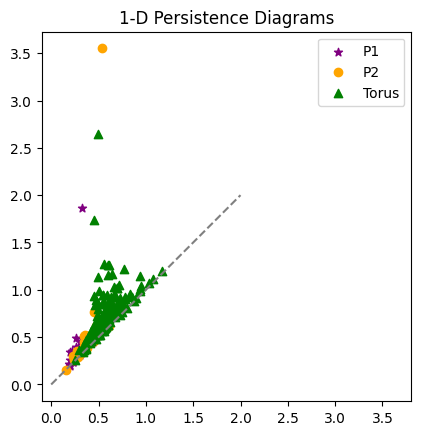

In [5]:
plt.plot([0,2],[0,2], color='gray', linestyle='--')
plt.scatter(Dgms1[1][:,0], Dgms1[1][:,1], marker = '*', color = 'purple', label = 'P1')
plt.scatter(Dgms2[1][:,0], Dgms2[1][:,1], color = 'orange', label = 'P2')
plt.scatter(DgmsT[1][:,0], DgmsT[1][:,1], color = 'green', marker = '^', label = 'Torus')
plt.axis('square')
plt.title('1-D Persistence Diagrams')
plt.legend();

## Computing Bottleneck Distance

Bottleneck and Wasserstein distance commands are in the `persim` module from `scikit-tda`. Here's we're going to compute the bottleneck distance between the 1-dimensional diagrams from the two annuli examples computed above. The code returns the distance value. 

In [6]:
bottleneck(Dgms1[1], Dgms2[1])

np.float64(1.5072879493236542)

If we want to see a bit more, we can ask for the matching as well as the distance as follows. 

In [7]:
dist, matching = bottleneck(Dgms1[1], Dgms2[1], matching=True)
print(dist)

1.5072879493236542


This matching is given as a matrix, where each row  gives the indices of the paired points from the diagrams, and the distance between those two points. So if the entry has $(i,j,d)$, then point $i$ from the first diagram is matched with point $j$ from the second, and those two points are distance $d$ from each other. They use an entry `-1` to indicate that the point is unmatched, AKA matched to the diagonal. 

In [8]:
# Just printing out a few rows to see
matching[:10,:]

array([[ 0.00000000e+00,  1.30000000e+01,  4.39319909e-02],
       [ 1.00000000e+00,  1.00000000e+01,  1.67351186e-01],
       [ 2.00000000e+00,  4.00000000e+00,  1.48225933e-01],
       [ 3.00000000e+00,  3.20000000e+01,  1.97753370e-01],
       [ 4.00000000e+00,  1.00000000e+00,  2.03044057e-01],
       [ 5.00000000e+00,  2.60000000e+01,  1.08057469e-01],
       [ 6.00000000e+00,  2.70000000e+01,  7.98587799e-02],
       [ 7.00000000e+00,  1.50000000e+01,  5.46116829e-02],
       [ 8.00000000e+00, -1.00000000e+00,  3.65316868e-03],
       [ 9.00000000e+00,  0.00000000e+00,  3.57827038e-01]])

In [9]:
print(f"The max in the matching is {np.max(matching[:,2])}, \nwhich should be the same as the distance returned:  {dist}")

The max in the matching is 1.5072879493236542, 
which should be the same as the distance returned:  1.5072879493236542


Now if we want to actually visualize the matching, we can use my plotting function from above. Here, a gray line is drawn connecting any pair of points that are matched, and a line is drawn to the diagonal if the point is unmatched.

### Annulus with annulus
This example shows the matching between the two annuli. In this case, the promient points are just far enough away from each other that it's cheaper to match them with the diagonal rather than each other. Also note that the blue point at approximately $(.2,1.7)$ would have a shorter match to the diagonal, but this doesn't matter because the length is dominated by the orange point's match to the diagonal. 


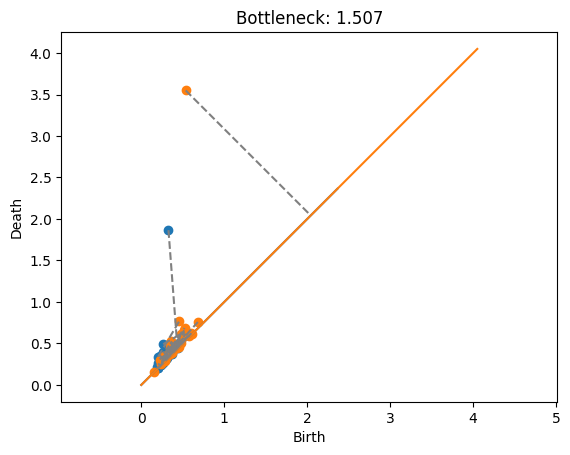

In [10]:
plot_matching(Dgms1, Dgms2, matching)
plt.title(f'Bottleneck: {dist:.3f}');

### Annulus with Torus 

Here is the torus (in orange) matched with each of the annuli. Note that the two points of the torus can't both be matched with the one point of the annulus. 

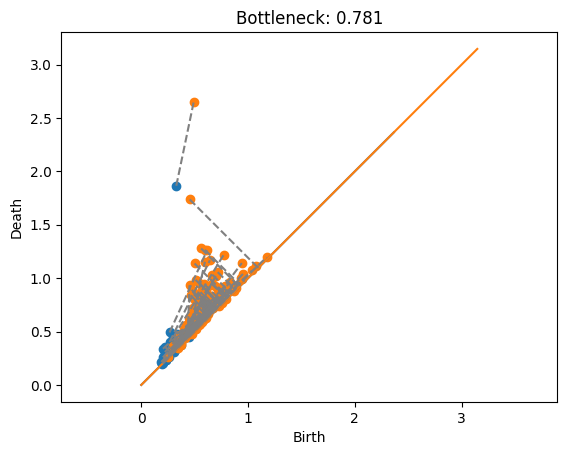

In [11]:
dist, matching = bottleneck(Dgms1[1], DgmsT[1], matching=True)
plot_matching(Dgms1, DgmsT, matching)
plt.title(f'Bottleneck: {dist:.3f}'); 

In [16]:
dist, matching = bottleneck(Dgms1[0], DgmsT[0], matching=True)
# plot_matching(Dgms1[0], DgmsT[0], matching)
# plt.title(f'Bottleneck: {dist:.3f}'); 

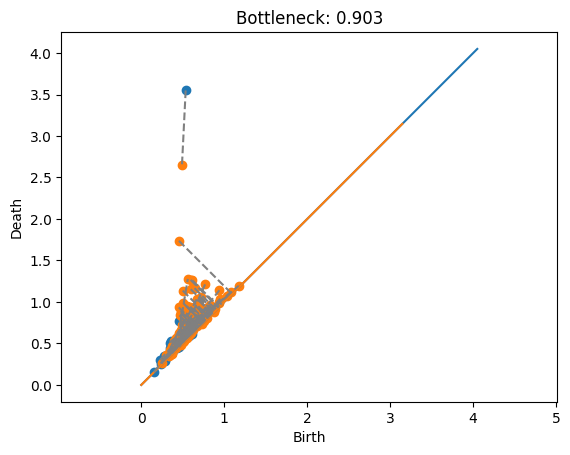

In [17]:
dist, matching = bottleneck(Dgms2[1], DgmsT[1], matching=True)
plot_matching(Dgms2, DgmsT, matching)
plt.title(f'Bottleneck: {dist:.3f}');

## Computing Wasserstein Distance 

Computing the Wasserstin distance is similar. Let's plot the outputs with the matchings found 

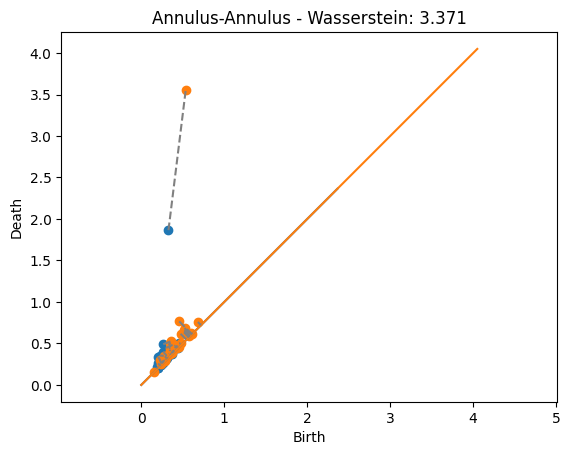

In [18]:
dist, matching = wasserstein(Dgms1[1], Dgms2[1], matching=True)
plot_matching(Dgms1, Dgms2, matching)
plt.title(f'Annulus-Annulus - Wasserstein: {dist:.3f}');

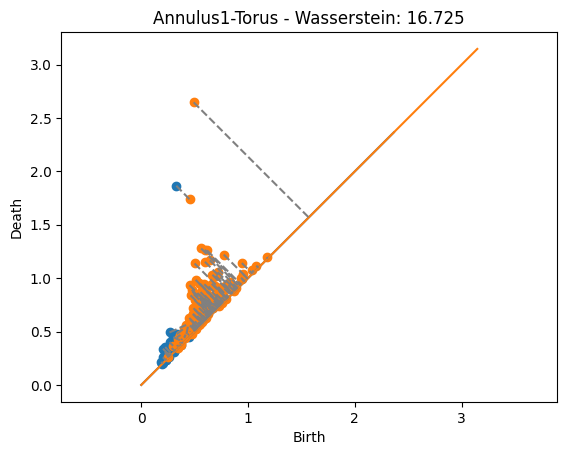

In [19]:
dist, matching = wasserstein(Dgms1[1], DgmsT[1], matching=True)
plot_matching(Dgms1, DgmsT, matching)
plt.title(f'Annulus1-Torus - Wasserstein: {dist:.3f}');

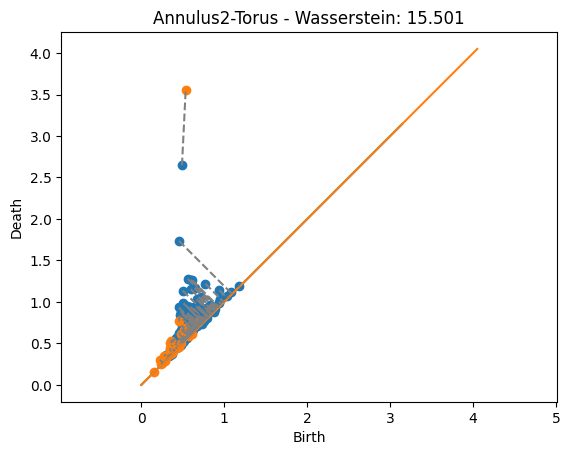

In [20]:
dist, matching = wasserstein(DgmsT[1], Dgms2[1], matching=True)
plot_matching(DgmsT, Dgms2, matching)
plt.title(f'Annulus2-Torus - Wasserstein: {dist:.3f}');

Things to notice:
- The distances are significantly higher than in the bottleneck case. That's because now we're adding up the value from the noise. 
- The matchings found now are actually giving the closest point since every matched pair of points contributes to the distance. This is unlike the bottleneck distance above where some matchings were longer than they could be but still less than the bottleneck distance because they didn't affect the distance.

## Distributions 



Lets take a look at how these distances behave relative to different kinds of diagrams. This generated test set will draw point clouds from several different classes, we're just going to keep the ones generated from an annulus, a torus, and a sphere. 

In [21]:
manifoldDF = gPC.testSetManifolds(10)
# Keep only the rows with torus, annulus, and sphere
manifoldsDF = manifoldDF[manifoldDF['trainingLabel'].isin(['Torus', 'Annulus', 'Sphere'])]
manifoldsDF = manifoldsDF.reset_index(drop=True)
manifoldsDF.head()

Dgm0  \
0  [[0.0, 0.007819653488695621], [0.0, 0.01302518...   
1  [[0.0, 0.02632305398583412], [0.0, 0.040707629...   
2  [[0.0, 0.017514366656541824], [0.0, 0.03365221...   
3  [[0.0, 0.014576570130884647], [0.0, 0.01523624...   
4  [[0.0, 0.005973882507532835], [0.0, 0.00714802...   

                                                Dgm1 trainingLabel  
0  [[0.4191993176937103, 0.4404963552951813], [0....       Annulus  
1  [[0.8978211879730225, 0.9040729403495789], [0....         Torus  
2  [[1.141452670097351, 1.183762788772583], [1.12...         Torus  
3  [[0.6589267253875732, 0.6930535435676575], [0....        Sphere  
4  [[0.46258941292762756, 0.46492934226989746], [...       Annulus

Now, we can compute the distance matrix for all pairs of 1-dimensional diagrams from this list and store it in a distance matrix. Be patient, this cell took about 30 seconds on my computer. 

In [25]:
D = np.zeros((len(manifoldsDF), len(manifoldsDF)))
for i in range(len(manifoldsDF)):
    for j in range(i+1, len(manifoldsDF)):
        Dgm1 = manifoldsDF.loc[i,'Dgm1']
        Dgm2 = manifoldsDF.loc[j,'Dgm1']
        D[i,j] = wasserstein(Dgm1, Dgm2)
        D[j,i] = D[i,j]
 

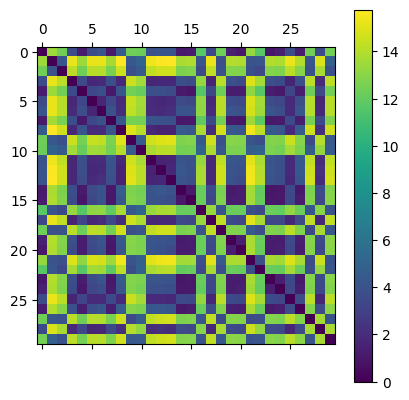

In [26]:
       
plt.matshow(D)
plt.colorbar()

To visualize, I'm going to use an [MDS](https://en.wikipedia.org/wiki/Multidimensional_scaling) plot for the distance matrix. Think of this as similar to PCA where each plotted point represents one input, in our case a persistence diagram. I've labeled the points by which kind of point cloud they were generated from. However, in this case the goal of the MDS plot is to draw points so that their relative distances are preserved. That is, points that are close in the distance are drawn close together relative to those that are farther apart. 

/Users/liz/Library/CloudStorage/Dropbox/Math/Teaching/TDA-TopicsCourse/.conda-tda-class/lib/python3.13/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
/var/folders/lm/dn75vz_d72b1cntn3ncjj10c0000gn/T/ipykernel_30280/3279050293.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(unique))


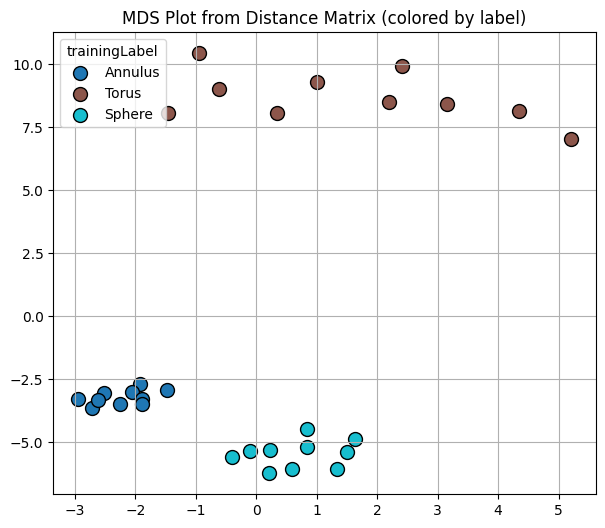

In [27]:
from sklearn.manifold import MDS
import matplotlib.cm as cm
from collections import OrderedDict

# Initialize MDS model and fit to our distance matrix
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
pos = mds.fit_transform(D)

# Create a color map for each unique label
labels = list(manifoldsDF['trainingLabel'])
unique = list(OrderedDict.fromkeys(labels))  # preserves order
cmap = cm.get_cmap('tab10', len(unique))
label_to_color = {lab: cmap(i) for i, lab in enumerate(unique)}
colors = [label_to_color[l] for l in labels]

# Plot with different colors per label
plt.figure(figsize=(7,6))
for lab in unique:
    idxs = [i for i, L in enumerate(labels) if L == lab]
    plt.scatter(pos[idxs,0], pos[idxs,1], s=100, color=label_to_color[lab], label=lab, edgecolor='k')


plt.title('MDS Plot from Distance Matrix (colored by label)')
plt.grid(True)
plt.legend(title='trainingLabel')
plt.show();

Notice that the diagrams drawn from the same kind of point cloud have small distance relative to those that come from different point clouds. 